# Global 2000: The World's Largest Public Companies (2017-2021)

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [12, 9]
plt.rcParams['font.size'] = 12
path = os.getcwd()                                         # get current working directory
warnings.simplefilter('ignore')

# Import Data

In [3]:
filepath = os.path.join('datasets', 'Forbes Top 2000(2017-2021).xlsx')
df = pd.read_excel(filepath)

# Head and Tail

In [4]:
df

,Rank,Name,Country,Sales,Profit,Assets,Market Value,Year
0,1.0,ICBC,China,151.381,41.9837,3473.238,229.805,2017
1,2.0,China Construction Bank,China,134.242,34.9814,3016.578,200.458,2017
2,3.0,Berkshire Hathaway,United States,222.935,24.074,620.854,409.908,2017
3,4.0,JPMorgan Chase,United States,102.494,24.231,2512.986,306.616,2017
4,5.0,Wells Fargo,United States,97.573,21.938,1943.443,274.385,2017
...,...,...,...,...,...,...,...,...
10095,1976.0,JTEKT,Japan,$13.1 B,$-34.9 M,$12 B,$3.5 B,2021
10096,1976.0,Insurance Australia Group,Australia,$5.4 B,$-212 M,$25 B,$9.3 B,2021
10097,1979.0,Sumec Corporation,China,$13 B,$79.2 M,$7.1 B,$1.3 B,2021
10098,1979.0,Gold Fields,South Africa,$3.9 B,$718.1 M,$7.5 B,$8.9 B,2021


In [5]:
df.shape

(10100, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10100 entries, 0 to 10099
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          9981 non-null   float64
 1   Name          10100 non-null  object 
 2   Country       10098 non-null  object 
 3   Sales         10093 non-null  object 
 4   Profit        10097 non-null  object 
 5   Assets        10086 non-null  object 
 6   Market Value  10092 non-null  object 
 7   Year          10100 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 631.4+ KB


In [7]:
df.rename(
    columns={'Market Value': 'MarketValue'}, inplace=True
)

df.head()

,Rank,Name,Country,Sales,Profit,Assets,MarketValue,Year
0,1.0,ICBC,China,151.381,41.9837,3473.238,229.805,2017
1,2.0,China Construction Bank,China,134.242,34.9814,3016.578,200.458,2017
2,3.0,Berkshire Hathaway,United States,222.935,24.074,620.854,409.908,2017
3,4.0,JPMorgan Chase,United States,102.494,24.231,2512.986,306.616,2017
4,5.0,Wells Fargo,United States,97.573,21.938,1943.443,274.385,2017


# 2017 Data Exploration

In [8]:
df_17 = df[df['Year'] == 2017]
df_17.head()

,Rank,Name,Country,Sales,Profit,Assets,MarketValue,Year
0,1.0,ICBC,China,151.381,41.9837,3473.238,229.805,2017
1,2.0,China Construction Bank,China,134.242,34.9814,3016.578,200.458,2017
2,3.0,Berkshire Hathaway,United States,222.935,24.074,620.854,409.908,2017
3,4.0,JPMorgan Chase,United States,102.494,24.231,2512.986,306.616,2017
4,5.0,Wells Fargo,United States,97.573,21.938,1943.443,274.385,2017


In [9]:
df_17.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rank         2000 non-null   float64
 1   Name         2000 non-null   object 
 2   Country      2000 non-null   object 
 3   Sales        1998 non-null   object 
 4   Profit       2000 non-null   object 
 5   Assets       1999 non-null   object 
 6   MarketValue  1999 non-null   object 
 7   Year         2000 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 140.6+ KB


In [10]:
df_17.shape

(2000, 8)

In [11]:
df_17[['Sales', 'Profit', 'Assets', 'MarketValue']] = df_17[['Sales', 'Profit', 'Assets', 'MarketValue']].astype(np.float64)   # change data type
df_17['Rank'] = df_17['Rank'].astype('category')

In [12]:
df_17.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Rank         2000 non-null   category
 1   Name         2000 non-null   object  
 2   Country      2000 non-null   object  
 3   Sales        1998 non-null   float64 
 4   Profit       2000 non-null   float64 
 5   Assets       1999 non-null   float64 
 6   MarketValue  1999 non-null   float64 
 7   Year         2000 non-null   int64   
dtypes: category(1), float64(4), int64(1), object(2)
memory usage: 209.1+ KB


In [13]:
df_17.describe(include='object')

,Name,Country
count,2000,2000
unique,1999,61
top,Merck,United States
freq,2,564


In [14]:
df_17['Name'].value_counts()

Merck                     2
ICBC                      1
Chugoku Electric Power    1
Agilent Technologies      1
JetBlue Airways           1
                         ..
Fortescue Metals Group    1
Commerzbank               1
DaVita                    1
West Japan Railway        1
Tech Mahindra             1
Name: Name, Length: 1999, dtype: int64

In [15]:
df_17['Country'].value_counts()

United States     564
Japan             229
China             200
United Kingdom     91
South Korea        64
                 ... 
Jordan              1
Oman                1
Mongolia            1
Czech Republic      1
Puerto Rico         1
Name: Country, Length: 61, dtype: int64

In [16]:
df_17['Rank'].value_counts()

1.0       1
1330.0    1
1343.0    1
1342.0    1
1341.0    1
         ..
662.0     1
661.0     1
660.0     1
659.0     1
2000.0    1
Name: Rank, Length: 2000, dtype: int64

In [17]:
df_17.describe(include='float64')

,Sales,Profit,Assets,MarketValue
count,1998.000000,2000.000000,1999.000000,1999.000000
mean,17.680185,1.241552,84.569579,24.423543
std,29.329947,2.918115,261.044216,44.772378
min,0.001000,-13.042100,0.001000,0.072000
25%,4.029250,0.317975,10.860500,6.639500
50%,8.802500,0.612300,22.884000,11.944000
75%,17.449500,1.279825,52.376000,24.362500
max,485.252000,45.217000,3473.238000,752.039000


# Exploratory Data Analysis

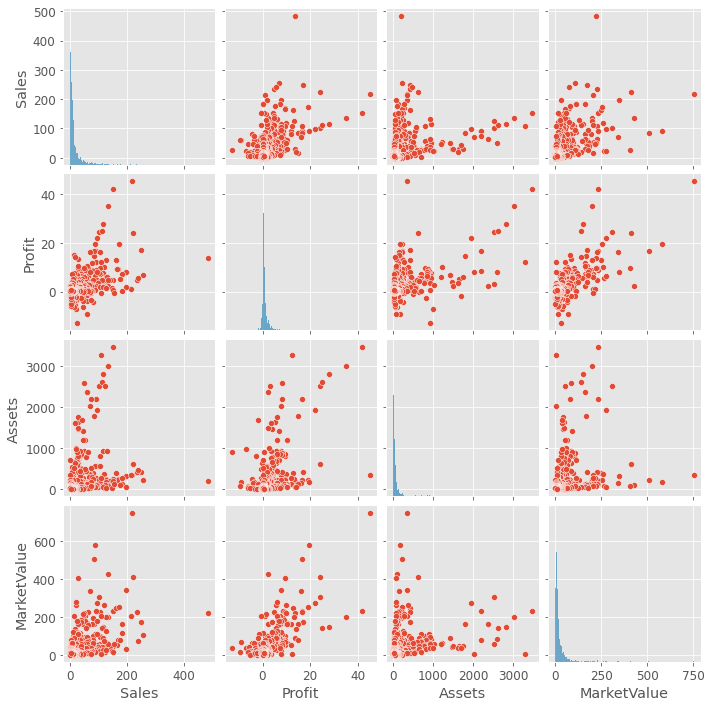

In [18]:
sns.pairplot(df_17[['Sales', 'Profit', 'Assets', 'MarketValue']])                # data is right skewed

# Missing Data Exploration

In [19]:
df_17.isna().sum()

Rank           0
Name           0
Country        0
Sales          2
Profit         0
Assets         1
MarketValue    1
Year           0
dtype: int64

In [20]:
df_17[df_17['Sales'].isna()]                    

,Rank,Name,Country,Sales,Profit,Assets,MarketValue,Year
1796,1797.0,Grupo Zuliano,Venezuela,NaN,0.9989,1.521,0.072,2017
1913,1914.0,Technipfmc,United Kingdom,NaN,0.0000,0.001,15.631,2017


In [21]:
df_17[df_17['Assets'].isna()]    

,Rank,Name,Country,Sales,Profit,Assets,MarketValue,Year
1726,1727.0,Bank of Greece,Greece,1.935,1.2084,NaN,0.24,2017


In [22]:
df_17[df_17['MarketValue'].isna()]   

,Rank,Name,Country,Sales,Profit,Assets,MarketValue,Year
1273,1274.0,Banca MPS,Italy,5.887,-3.5853,161.828,NaN,2017


In [23]:
df_17_drop = df_17.dropna() 
df_17_drop.head()

,Rank,Name,Country,Sales,Profit,Assets,MarketValue,Year
0,1.0,ICBC,China,151.381,41.9837,3473.238,229.805,2017
1,2.0,China Construction Bank,China,134.242,34.9814,3016.578,200.458,2017
2,3.0,Berkshire Hathaway,United States,222.935,24.0740,620.854,409.908,2017
3,4.0,JPMorgan Chase,United States,102.494,24.2310,2512.986,306.616,2017
4,5.0,Wells Fargo,United States,97.573,21.9380,1943.443,274.385,2017


In [24]:
df_17_drop.isna().sum()

Rank           0
Name           0
Country        0
Sales          0
Profit         0
Assets         0
MarketValue    0
Year           0
dtype: int64

# Grouping and Aggregation (2017)

In [25]:
df_17_drop_gpd = df_17_drop.groupby('Country').agg([np.min, np.mean, np.max, np.sum])
df_17_drop_gpd

Sales                                 Profit            \
                       amin       mean     amax        sum    amin      mean   
Country                                                                        
Argentina             0.360   6.098667   14.219     18.296 -1.9110 -0.461333   
Australia             0.549  11.082897   50.033    432.233 -1.4979  1.237331   
Austria               3.093  10.303750   21.306     82.430 -0.4458  0.387875   
Bahrain               1.608   1.646500    1.685      3.293  0.1830  0.363050   
Belgium               0.393  12.933222   45.558    116.399  0.0300  0.756222   
...                     ...        ...      ...        ...     ...       ...   
United Arab Emirates  1.352   3.917571   14.255     54.846 -5.1821  0.592321   
United Kingdom        0.644  21.029667  183.834   1892.670 -9.2638  0.719003   
United States         0.031  20.396835  485.252  11503.815 -6.1770  1.640453   
Venezuela             0.370   3.660500    6.951      7.321  2.0042  2.273150   
Vietnam               2.087   2.537000    3.293     10.148  0.2754  0.320325   

                                         Assets                        \
                         amax       sum    amin        mean      amax   
Country                                                                 
Argentina              0.4073   -1.3840   0.811   14.243667    26.612   
Australia              7.0652   48.2559   3.840   92.461923   703.622   
Austria                1.3804    3.1030  11.518   62.299500   220.843   
Bahrain                0.5431    0.7261  30.141   30.731500    31.322   
Belgium                2.6847    6.8060   4.442  104.175556   290.267   
...                       ...       ...     ...         ...       ...   
United Arab Emirates   2.2927    8.2925   5.013   41.407214   121.976   
United Kingdom         6.2715   64.7103   2.771  132.768400  2374.986   
United States         45.2170  925.2156   0.292   71.467413  3287.968   
Venezuela              2.5421    4.5463   2.575   75.617000   148.659   
Vietnam                0.3964    1.2813   1.290   30.440250    44.207   

                                MarketValue                                 \
                            sum        amin       mean     amax        sum   
Country                                                                      
Argentina                42.731       5.134  11.769000   20.230     35.307   
Australia              3606.015       3.491  23.192051  109.902    904.490   
Austria                 498.396       2.374   7.114875   13.617     56.919   
Bahrain                  61.463       1.088   3.513500    5.939      7.027   
Belgium                 937.580       0.373  33.344444  213.102    300.100   
...                         ...         ...        ...      ...        ...   
United Arab Emirates    579.701       0.941  10.726071   42.739    150.165   
United Kingdom        11949.156       1.601  23.422467  162.638   2108.022   
United States         40307.621       0.681  38.202078  752.039  21545.972   
Venezuela               151.234       2.512   2.618500    2.725      5.237   
Vietnam                 121.761       2.580   5.128750    9.134     20.515   

                      Year                         
                      amin    mean  amax      sum  
Country                                            
Argentina             2017  2017.0  2017     6051  
Australia             2017  2017.0  2017    78663  
Austria               2017  2017.0  2017    16136  
Bahrain               2017  2017.0  2017     4034  
Belgium               2017  2017.0  2017    18153  
...                    ...     ...   ...      ...  
United Arab Emirates  2017  2017.0  2017    28238  
United Kingdom        2017  2017.0  2017   181530  
United States         2017  2017.0  2017  1137588  
Venezuela             2017  2017.0  2017     4034  
Vietnam               2017  2017.0  2017     8068  

[61 rows x 20 columns]

# Data Visualization

In [26]:
# helper function for formatting plot y-axis
from matplotlib.ticker import FuncFormatter

def trillion(x, pos):
    'The two args are the value and tick position'
    return '%1.1fTn ' % (x * 1e-3)

format_trill = FuncFormatter(trillion)

def plot_bar(y, width, color=None, xlabel=None, ylabel=None, title=None):
    # Initialize the matplotlib figure
    fig, ax = plt.subplots()

    # plot bar chart
    ax.barh(y=y, width=width, color=color)

    # Add informative axis label
    ax.set(xlabel=xlabel, ylabel=ylabel, title=title)

    # labels read top-to-bottom
    ax.invert_yaxis()  

    # set axis formatter
    ax.xaxis.set_major_formatter(format_trill)
    return plot_bar

In [27]:
def plot_bar1(y, width, color=None, xlabel=None, ylabel=None, title=None):
    # Initialize the matplotlib figure
    fig1, ax1 = plt.subplots()

    # plot bar chart
    ax1.barh(y=y, width=width, color=color)

    # Add informative axis label
    ax1.set(xlabel=xlabel, ylabel=ylabel, title=title)

    # labels read top-to-bottom
    ax1.invert_yaxis()  

    return plot_bar1

In [28]:
# extract top ten countries either in Sales, Profit, Assets or Market Value
def extract_top10(df, col1: str, col2: str):
    return df[col1][col2].sort_values(ascending=False).head(10)

# extract bottom ten countries either in Sales, Profit, Assets or Market Value
def extract_bot10(df, col1: str, col2: str):
    return df[col1][col2].sort_values(ascending=True).head(10)

Explore by Country in terms of total Sales

In [29]:
print(extract_top10(df_17_drop_gpd, 'Sales', 'sum'))    
print('*' * 28)
print(extract_bot10(df_17_drop_gpd, 'Sales', 'sum'))

Country
United States     11503.815
Japan              4195.509
China              3904.757
United Kingdom     1892.670
Germany            1843.269
France             1614.835
South Korea        1243.110
Switzerland         871.529
Hong Kong           763.402
Canada              724.086
Name: sum, dtype: float64
****************************
Country
Oman           1.393
Pakistan       1.613
Puerto Rico    1.933
Egypt          2.234
Jordan         2.373
Bahrain        3.293
Mongolia       3.812
Nigeria        4.432
Peru           6.313
Lebanon        6.317
Name: sum, dtype: float64


<function __main__.plot_bar(y, width, color=None, xlabel=None, ylabel=None, title=None)>

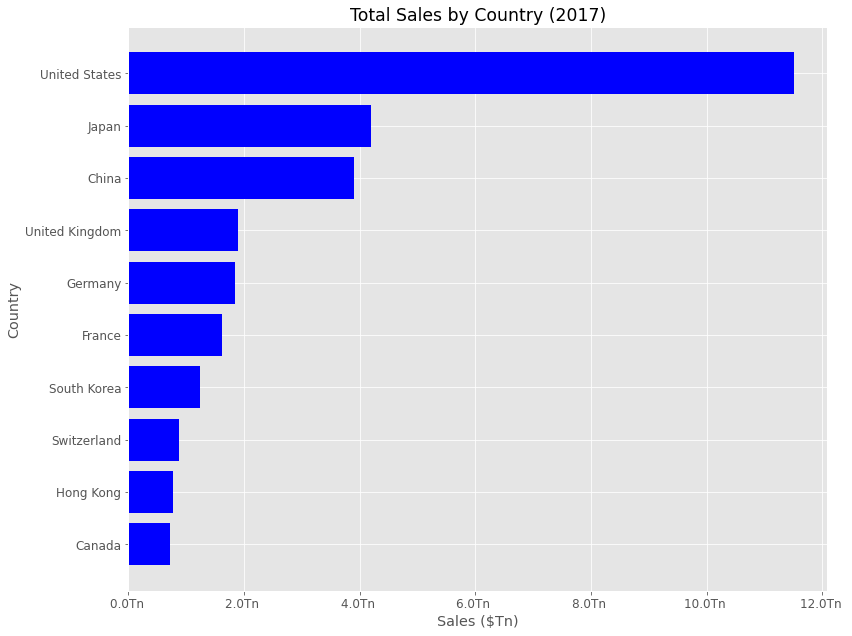

In [30]:
top10_sales = extract_top10(df=df_17_drop_gpd, col1='Sales', col2='sum')
y, width = top10_sales.keys(), top10_sales.values

plot_bar(y=y, width=width, color='blue', xlabel='Sales ($Tn)', ylabel='Country', title='Total Sales by Country (2017)')

<function __main__.plot_bar1(y, width, color=None, xlabel=None, ylabel=None, title=None)>

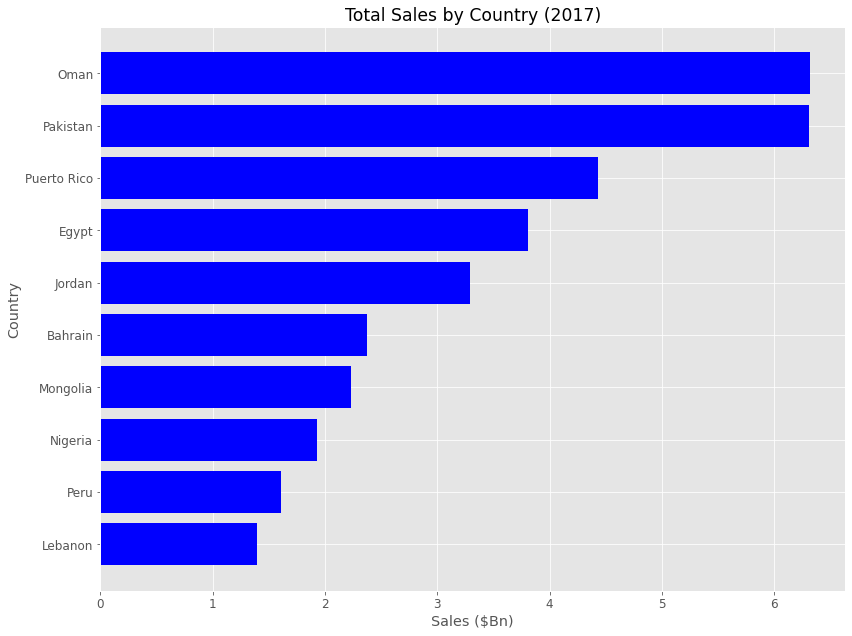

In [31]:
bott10_sales = extract_bot10(df=df_17_drop_gpd, col1='Sales', col2='sum')
y, width = bott10_sales.keys(), sorted(bott10_sales.values, reverse=True)

plot_bar1(y=y, width=width, color='blue', xlabel='Sales ($Bn)', ylabel='Country', title='Total Sales by Country (2017)')

Explore by Country in terms of total Profit

In [32]:
print(extract_top10(df_17_drop_gpd, 'Profit', 'sum'))    
print('*' * 28)
print(extract_bot10(df_17_drop_gpd, 'Profit', 'sum'))

Country
United States     925.2156
China             368.2946
Japan             197.2893
France             85.5464
Hong Kong          80.6815
South Korea        66.3613
Germany            66.1572
United Kingdom     64.7103
Russia             61.2134
Switzerland        60.2310
Name: sum, dtype: float64
****************************
Country
Argentina        -1.3840
Mongolia         -0.2672
Italy            -0.0878
Hungary          -0.0219
Puerto Rico       0.2167
Pakistan          0.3254
Oman              0.4586
Jordan            0.5222
Czech Republic    0.5844
Egypt             0.5968
Name: sum, dtype: float64


<function __main__.plot_bar(y, width, color=None, xlabel=None, ylabel=None, title=None)>

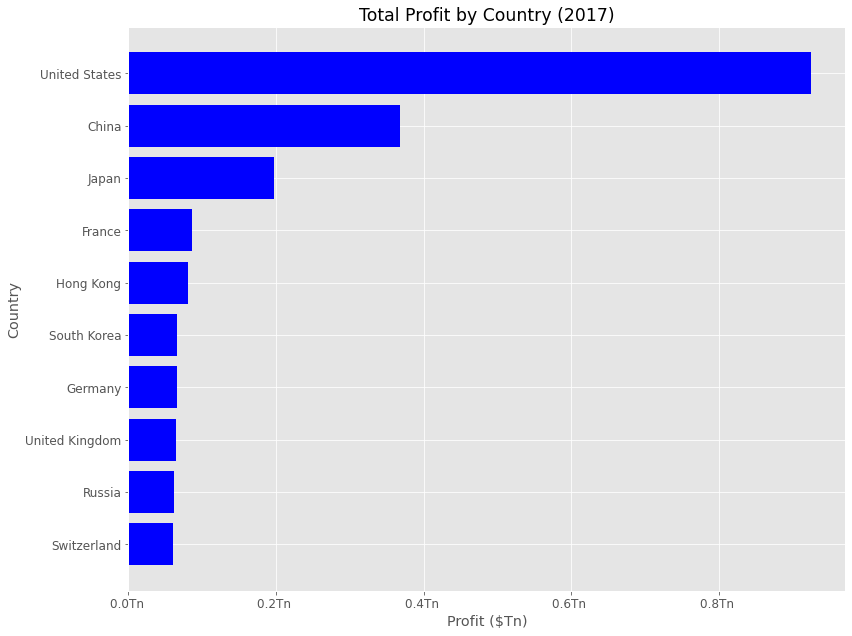

In [33]:
top10_profit = extract_top10(df=df_17_drop_gpd, col1='Profit', col2='sum')
y, width = top10_profit.keys(), top10_profit.values

plot_bar(y=y, width=width, color='blue', xlabel='Profit ($Tn)', ylabel='Country', title='Total Profit by Country (2017)')

<function __main__.plot_bar1(y, width, color=None, xlabel=None, ylabel=None, title=None)>

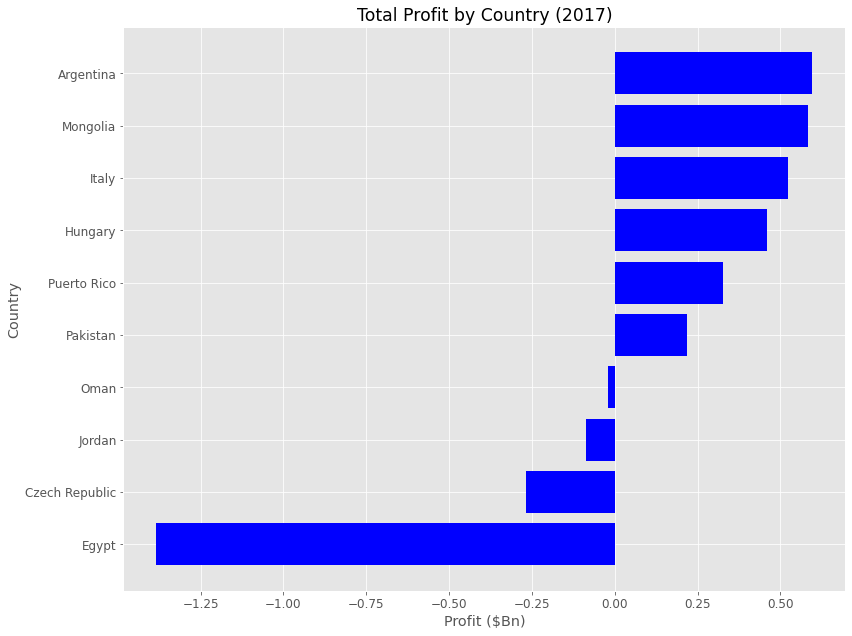

In [34]:
bott10_profit = extract_bot10(df=df_17_drop_gpd, col1='Profit', col2='sum')
y, width = bott10_profit.keys(), sorted(bott10_profit.values, reverse=True)

plot_bar1(y=y, width=width, color='blue', xlabel='Profit ($Bn)', ylabel='Country', title='Total Profit by Country (2017)')

Explore by Country in terms of total Assets

In [35]:
print(extract_top10(df_17_drop_gpd, 'Assets', 'sum'))    
print('*' * 28)
print(extract_bot10(df_17_drop_gpd, 'Assets', 'sum'))

Country
United States     40307.621
China             28624.613
Japan             19306.301
United Kingdom    11949.156
France             9874.850
Germany            6324.612
Canada             5839.240
Switzerland        3904.148
Spain              3862.175
Italy              3781.279
Name: sum, dtype: float64
****************************
Country
Egypt             14.757
Nigeria           19.899
Mongolia          21.142
Pakistan          24.069
Czech Republic    24.625
Oman              28.104
Puerto Rico       38.662
Argentina         42.731
Jordan            47.460
Hungary           53.284
Name: sum, dtype: float64


<function __main__.plot_bar(y, width, color=None, xlabel=None, ylabel=None, title=None)>

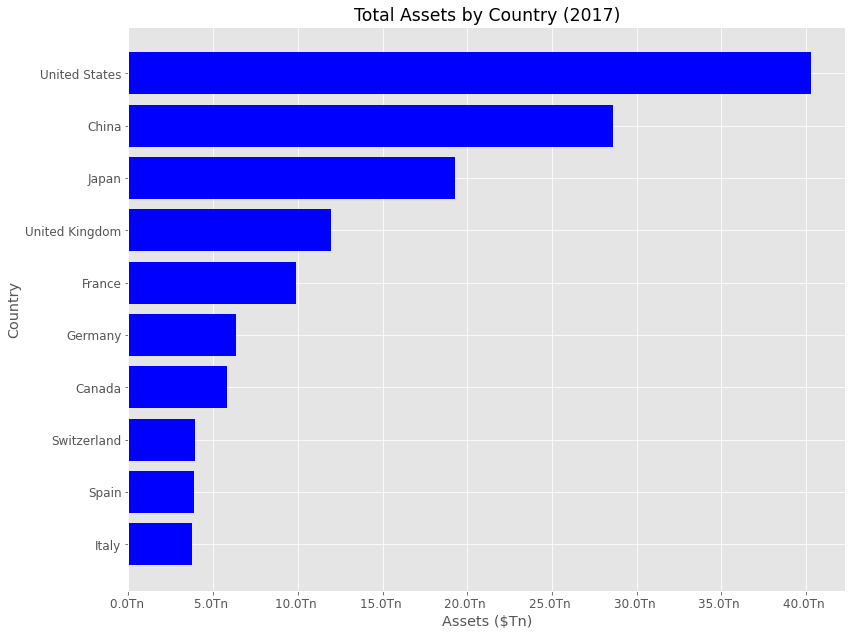

In [36]:
top10_assets = extract_top10(df=df_17_drop_gpd, col1='Assets', col2='sum')
y, width = top10_assets.keys(), top10_assets.values

plot_bar(y=y, width=width, color='blue', xlabel='Assets ($Tn)', ylabel='Country', title='Total Assets by Country (2017)')

<function __main__.plot_bar1(y, width, color=None, xlabel=None, ylabel=None, title=None)>

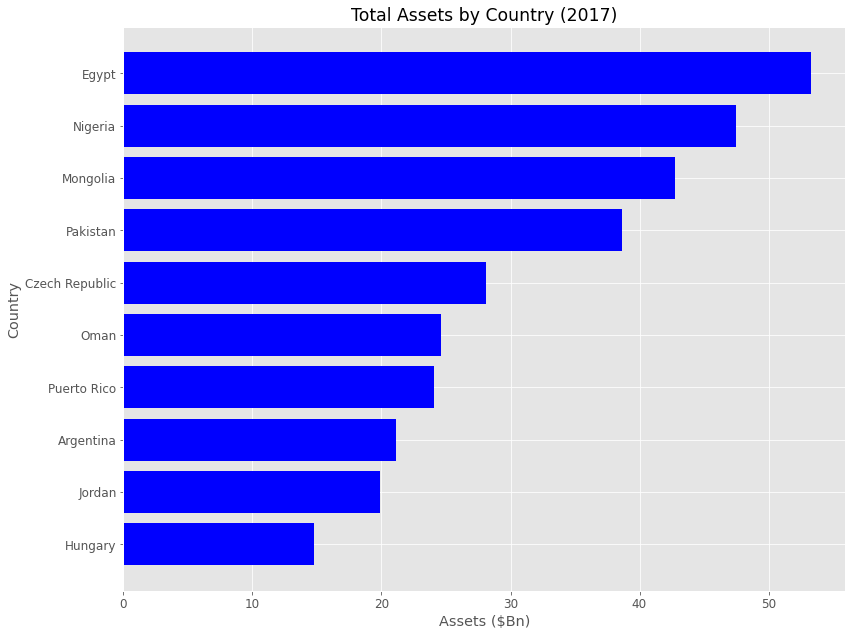

In [37]:
bott10_assets = extract_bot10(df=df_17_drop_gpd, col1='Assets', col2='sum')
y, width = bott10_assets.keys(), sorted(bott10_assets.values, reverse=True)

plot_bar1(y=y, width=width, color='blue', xlabel='Assets ($Bn)', ylabel='Country', title='Total Assets by Country (2017)')

Explore by Country in terms of total Market Value

In [38]:
print(extract_top10(df_17_drop_gpd, 'MarketValue', 'sum'))    
print('*' * 28)
print(extract_bot10(df_17_drop_gpd, 'MarketValue', 'sum'))

Country
United States     21545.972
China              4649.178
Japan              3243.379
United Kingdom     2108.022
France             1610.053
Switzerland        1485.401
Germany            1462.979
Canada             1209.130
Hong Kong          1119.143
India               928.608
Name: sum, dtype: float64
****************************
Country
Oman               2.818
Pakistan           3.740
Puerto Rico        4.161
Egypt              4.999
Venezuela          5.237
Lebanon            5.338
Jordan             5.657
Bahrain            7.027
Czech Republic     9.190
Nigeria           10.623
Name: sum, dtype: float64


<function __main__.plot_bar(y, width, color=None, xlabel=None, ylabel=None, title=None)>

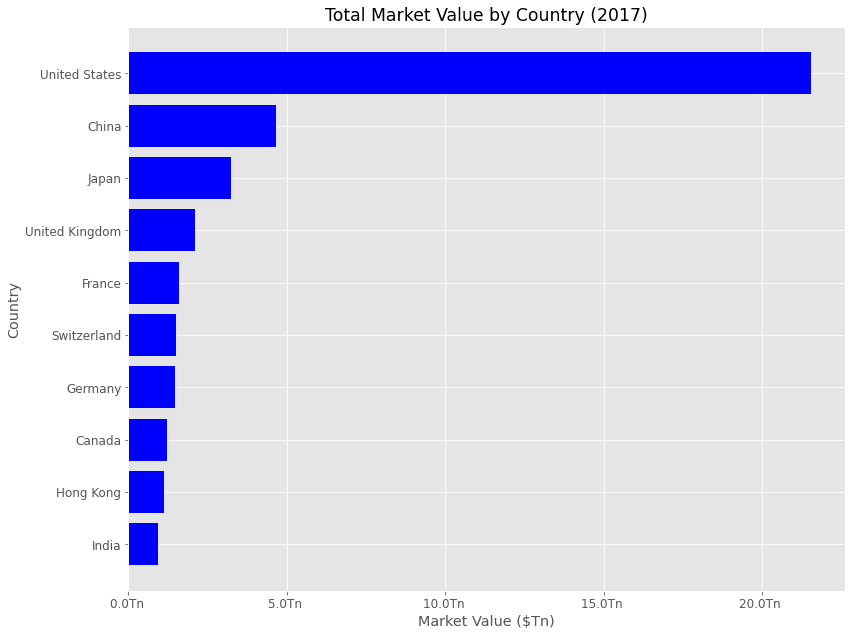

In [39]:
top10_mktval = extract_top10(df=df_17_drop_gpd, col1='MarketValue', col2='sum')
y, width = top10_mktval.keys(), top10_mktval.values

plot_bar(y=y, width=width, color='blue', xlabel='Market Value ($Tn)', ylabel='Country', title='Total Market Value by Country (2017)')

<function __main__.plot_bar1(y, width, color=None, xlabel=None, ylabel=None, title=None)>

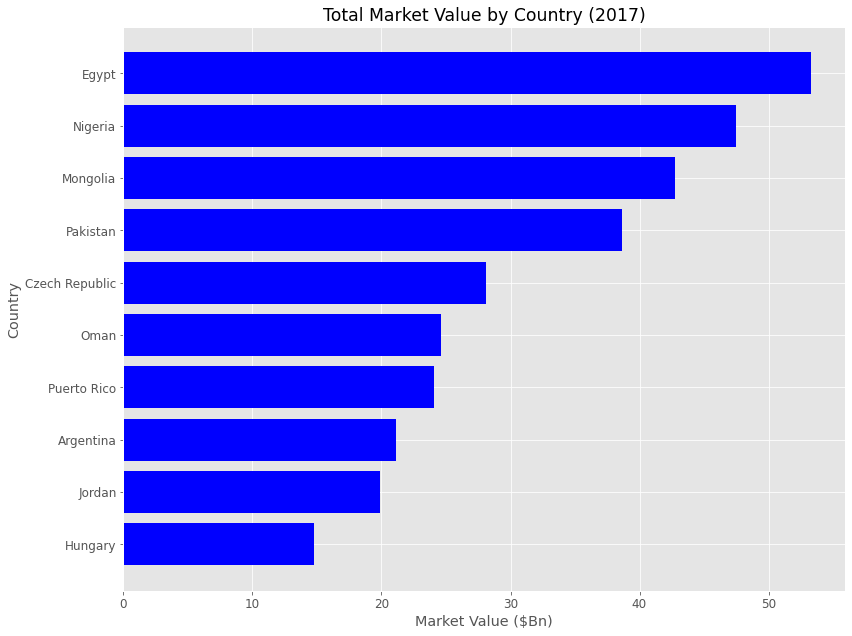

In [40]:
bott10_mktval = extract_bot10(df=df_17_drop_gpd, col1='Assets', col2='sum')
y, width = bott10_mktval.keys(), sorted(bott10_mktval.values, reverse=True)

plot_bar1(y=y, width=width, color='blue', xlabel='Market Value ($Bn)', ylabel='Country', title='Total Market Value by Country (2017)')

# 2021 Data Exploration

In [41]:
df_21 = df[df['Year'] == 2021]
df_21.head()

,Rank,Name,Country,Sales,Profit,Assets,MarketValue,Year
8000,1.0,ICBC,China,$190.5 B,$45.8 B,"$4,914.7 B",$249.5 B,2021
8001,2.0,JPMorgan Chase,United States,$136.2 B,$40.4 B,"$3,689.3 B",$464.8 B,2021
8002,3.0,Berkshire Hathaway,United States,$245.5 B,$42.5 B,$873.7 B,$624.4 B,2021
8003,4.0,China Construction Bank,China,$173.5 B,$39.3 B,"$4,301.7 B",$210.4 B,2021
8004,5.0,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,$229.7 B,$49.3 B,$510.3 B,"$1,897.2 B",2021


In [42]:
df_21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2100 entries, 8000 to 10099
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rank         1981 non-null   float64
 1   Name         2100 non-null   object 
 2   Country      2100 non-null   object 
 3   Sales        2100 non-null   object 
 4   Profit       2100 non-null   object 
 5   Assets       2098 non-null   object 
 6   MarketValue  2100 non-null   object 
 7   Year         2100 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 147.7+ KB


In [43]:
df_21.shape

(2100, 8)

In [44]:
df_21_new = df_21[:200]                                     # create a new dataframe (0 - 199)  - top 200 companies
df_21_new.head()

,Rank,Name,Country,Sales,Profit,Assets,MarketValue,Year
8000,1.0,ICBC,China,$190.5 B,$45.8 B,"$4,914.7 B",$249.5 B,2021
8001,2.0,JPMorgan Chase,United States,$136.2 B,$40.4 B,"$3,689.3 B",$464.8 B,2021
8002,3.0,Berkshire Hathaway,United States,$245.5 B,$42.5 B,$873.7 B,$624.4 B,2021
8003,4.0,China Construction Bank,China,$173.5 B,$39.3 B,"$4,301.7 B",$210.4 B,2021
8004,5.0,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,$229.7 B,$49.3 B,$510.3 B,"$1,897.2 B",2021


In [45]:
df_21_new.shape

(200, 8)

In [46]:
df_21_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 8000 to 8199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rank         189 non-null    float64
 1   Name         200 non-null    object 
 2   Country      200 non-null    object 
 3   Sales        200 non-null    object 
 4   Profit       200 non-null    object 
 5   Assets       200 non-null    object 
 6   MarketValue  200 non-null    object 
 7   Year         200 non-null    int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 14.1+ KB


In [47]:
df_21_new.describe(include='object')

,Name,Country,Sales,Profit,Assets,MarketValue
count,200,200,200,200,200,200
unique,200,24,182,108,197,186
top,ICBC,United States,$24.5 B,$3.6 B,$64.6 B,$53.3 B
freq,1,76,3,7,2,3


# Data Cleaning

In [48]:
# strip dataframe of $ and B signs
df_21_new[['Sales', 'Profit', 'Assets', 'MarketValue']] = df_21_new[['Sales', 'Profit', 'Assets', 'MarketValue']].applymap(lambda x: str.lstrip(x, '$'))
df_21_new[['Sales', 'Profit', 'Assets', 'MarketValue']] = df_21_new[['Sales', 'Profit', 'Assets', 'MarketValue']].applymap(lambda x: str.rstrip(x, 'B'))
df_21_new = df_21_new.replace(',', '', regex=True)                   # strip all commas 
df_21_new

,Rank,Name,Country,Sales,Profit,Assets,MarketValue,Year
8000,1.0,ICBC,China,190.5,45.8,4914.7,249.5,2021
8001,2.0,JPMorgan Chase,United States,136.2,40.4,3689.3,464.8,2021
8002,3.0,Berkshire Hathaway,United States,245.5,42.5,873.7,624.4,2021
8003,4.0,China Construction Bank,China,173.5,39.3,4301.7,210.4,2021
8004,5.0,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,229.7,49.3,510.3,1897.2,2021
...,...,...,...,...,...,...,...,...
8195,185.0,DBS,Singapore,13.2,3.4,491.9,55.4,2021
8196,186.0,Bank of New York Mellon,United States,15.9,3.6,469.6,40.4,2021
8197,187.0,Longfor Group Holdings,China,27,2.9,117,39.4,2021
8198,188.0,Schneider Electric,France,28.7,2.4,60.5,91.3,2021


# Change Data Types

In [49]:
df_21_new[['Sales', 'Profit', 'Assets', 'MarketValue']] = df_21_new[['Sales', 'Profit', 'Assets', 'MarketValue']].astype('float')
df_21_new['Rank'] = df_21_new['Rank'].astype('category')

In [50]:
df_21_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 8000 to 8199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Rank         189 non-null    category
 1   Name         200 non-null    object  
 2   Country      200 non-null    object  
 3   Sales        200 non-null    float64 
 4   Profit       200 non-null    float64 
 5   Assets       200 non-null    float64 
 6   MarketValue  200 non-null    float64 
 7   Year         200 non-null    int64   
dtypes: category(1), float64(4), int64(1), object(2)
memory usage: 18.3+ KB


In [51]:
df_21_new['Rank'].value_counts()

6.0      3
141.0    2
90.0     2
55.0     2
146.0    2
        ..
63.0     1
64.0     1
65.0     1
66.0     1
189.0    1
Name: Rank, Length: 175, dtype: int64

In [52]:
df_21_new['Name'].value_counts()

ICBC                       1
Honeywell International    1
China Citic Bank           1
Mizuho Financial           1
Deutsche Post              1
                          ..
PepsiCo                    1
Oracle                     1
Sanofi                     1
Enel                       1
Travelers                  1
Name: Name, Length: 200, dtype: int64

In [53]:
df_21_new['Country'].value_counts().head()

United States     76
China             27
Japan             15
United Kingdom    10
Germany            9
Name: Country, dtype: int64

In [54]:
df_21_new.describe(include='float64')

,Sales,Profit,Assets,MarketValue
count,200.000000,200.000000,200.000000,200.00000
mean,75.599000,8.348000,569.850500,178.06600
std,71.534219,9.634788,856.172533,303.94761
min,13.200000,1.100000,40.000000,22.30000
25%,32.200000,3.400000,105.300000,53.30000
50%,50.500000,5.150000,204.550000,94.80000
75%,89.675000,8.500000,640.175000,166.10000
max,559.200000,63.900000,4914.700000,2252.30000


# Exploratory Data Analysis

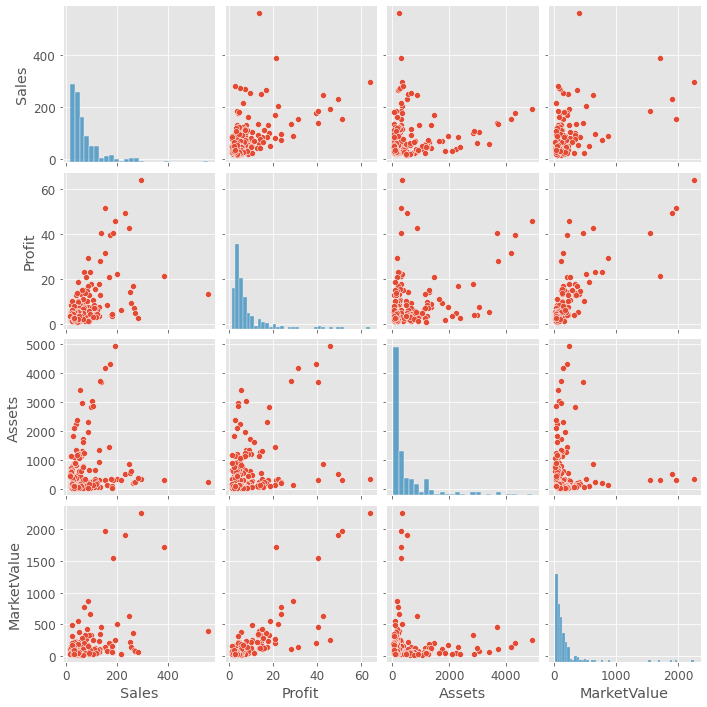

In [55]:
sns.pairplot(df_21_new[['Sales', 'Profit', 'Assets', 'MarketValue']])                               # data is right skewed

# Missing Data Exploration

In [56]:
df_21_new.isna().sum()

Rank           11
Name            0
Country         0
Sales           0
Profit          0
Assets          0
MarketValue     0
Year            0
dtype: int64

In [57]:
idx = df_21_new[df_21_new['Rank'].isna()]                         # most missing rank values are ties
idx

,Rank,Name,Country,Sales,Profit,Assets,MarketValue,Year
8015,NaN,Citigroup,United States,84.4,17.1,2314.3,151.2,2021
8031,NaN,China Mobile,Hong Kong,111.3,15.6,264.2,134.9,2021
8047,NaN,Sinopec,China,271.1,4.8,265.1,82.6,2021
8063,NaN,LVMH Moët Hennessy Louis Vuitton,France,50.9,5.4,133.0,380.3,2021
8079,NaN,UBS,Switzerland,32.2,6.5,1125.8,57.3,2021
8095,NaN,China Vanke,China,62.6,6.1,285.8,42.2,2021
8121,NaN,Visa,United States,21.5,10.4,80.4,483.9,2021
8137,NaN,Honeywell International,United States,32.6,4.8,64.6,161.2,2021
8153,NaN,Banco Bradesco,Brazil,26.7,3.2,306.3,40.9,2021
8169,NaN,Southern Company,United States,20.2,3.1,122.9,68.7,2021


In [58]:
df_ff = df_21_new.ffill()               # fill missing values based on the corresponding value in the previous row for ties in rank
df_ff.isna().sum()

Rank           0
Name           0
Country        0
Sales          0
Profit         0
Assets         0
MarketValue    0
Year           0
dtype: int64

# Top 20 Companies Exploration (2021)

In [59]:
df2 = df_ff[:20]
df2.head(10)

,Rank,Name,Country,Sales,Profit,Assets,MarketValue,Year
8000,1.0,ICBC,China,190.5,45.8,4914.7,249.5,2021
8001,2.0,JPMorgan Chase,United States,136.2,40.4,3689.3,464.8,2021
8002,3.0,Berkshire Hathaway,United States,245.5,42.5,873.7,624.4,2021
8003,4.0,China Construction Bank,China,173.5,39.3,4301.7,210.4,2021
8004,5.0,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,229.7,49.3,510.3,1897.2,2021
8005,6.0,Apple,United States,294.0,63.9,354.1,2252.3,2021
8006,6.0,Bank of America,United States,98.8,17.9,2832.2,336.3,2021
8007,6.0,Ping An Insurance Group,China,169.1,20.8,1453.8,211.2,2021
8008,9.0,Agricultural Bank of China,China,153.9,31.3,4159.9,140.1,2021
8009,10.0,Amazon,United States,386.1,21.3,321.2,1711.8,2021


# Data Visualization

In [60]:
def plot_bar2(y, width, color=None, xlabel=None, ylabel=None, title=None):
    # Initialize the matplotlib figure
    fig, ax = plt.subplots()

    # plot bar chart
    ax.barh(y=y, width=width, color=color)

    # Add informative axis label
    ax.set(xlabel=xlabel, ylabel=ylabel, title=title)

    # labels read top-to-bottom
    ax.invert_yaxis()  

    return plot_bar2

<function __main__.plot_bar2(y, width, color=None, xlabel=None, ylabel=None, title=None)>

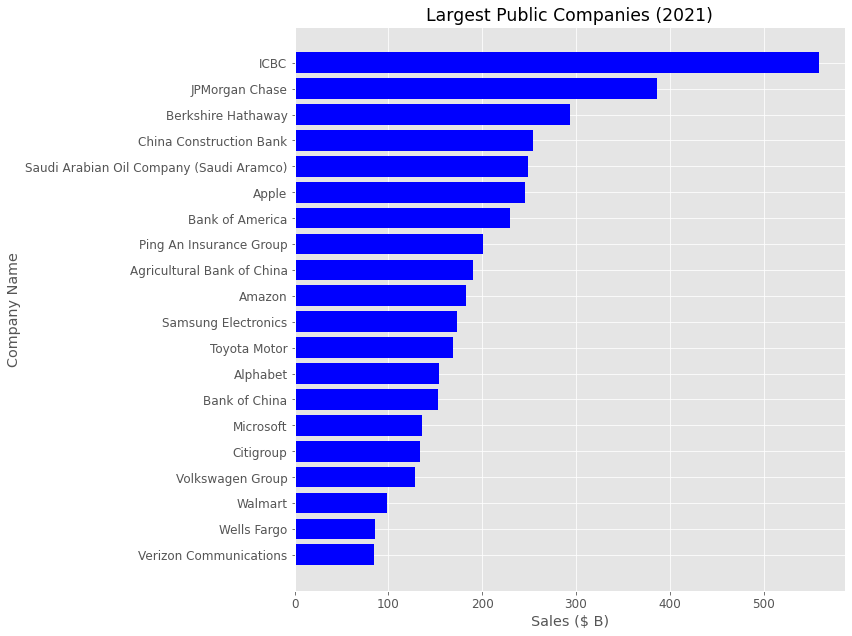

In [61]:
plot_bar2(
    y=df2['Name'], width=df2['Sales'].sort_values(ascending=False), color='blue',
    xlabel='Sales ($ B)', ylabel='Company Name', title='Largest Public Companies (2021)', 
)

<function __main__.plot_bar2(y, width, color=None, xlabel=None, ylabel=None, title=None)>

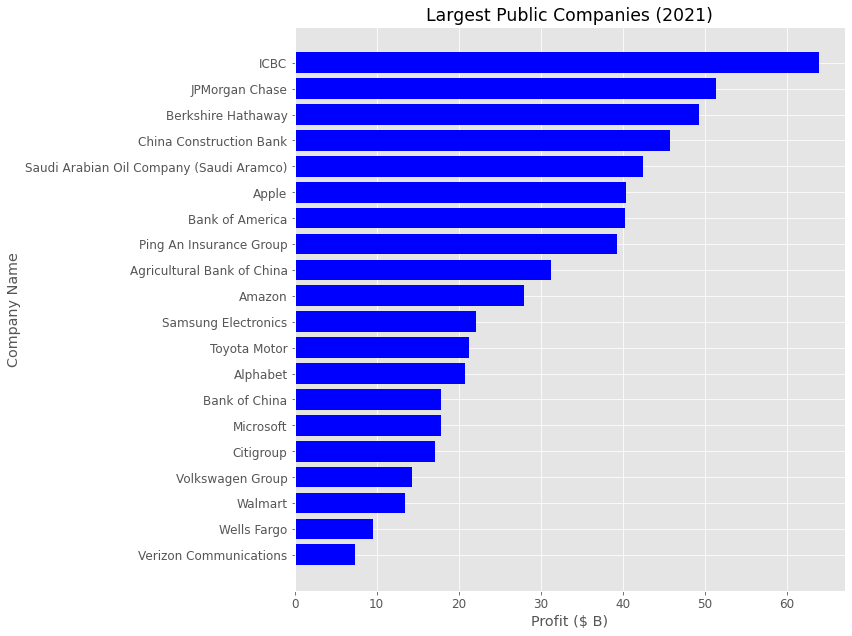

In [62]:
plot_bar2(
    y=df2['Name'], width=df2['Profit'].sort_values(ascending=False), color='blue',
    xlabel='Profit ($ B)', ylabel='Company Name', title='Largest Public Companies (2021)', 
)

In [63]:
def plot_bar3(y, width, color=None, xlabel=None, ylabel=None, title=None):
    # Initialize the matplotlib figure
    fig, ax = plt.subplots()

    # plot bar chart
    ax.barh(y=y, width=width, color=color)

    # Add informative axis label
    ax.set(xlabel=xlabel, ylabel=ylabel, title=title)

    # labels read top-to-bottom
    ax.invert_yaxis()

    # set y-axis major formatter
    ax.xaxis.set_major_formatter(format_trill)  

    return plot_bar3

<function __main__.plot_bar3(y, width, color=None, xlabel=None, ylabel=None, title=None)>

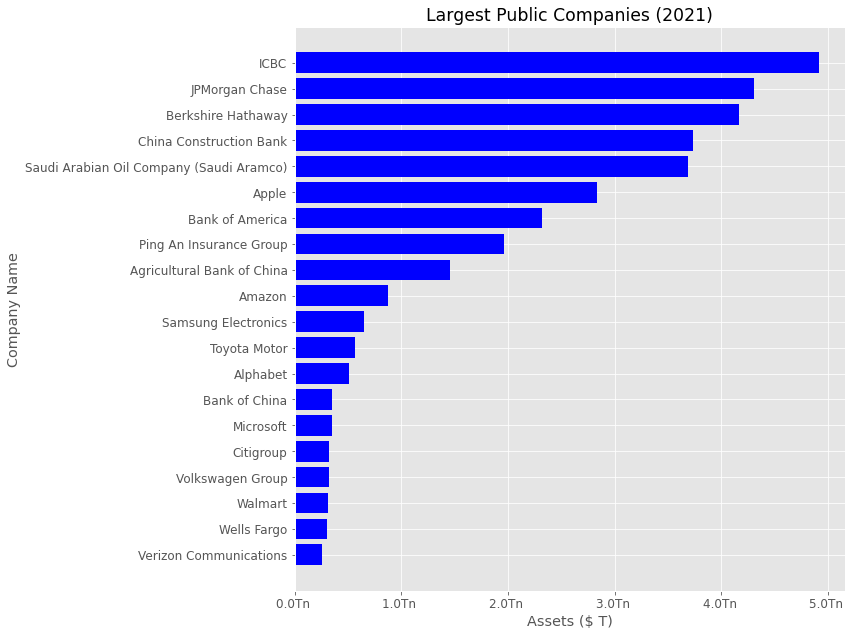

In [64]:
plot_bar3(
    y=df2['Name'], width=df2['Assets'].sort_values(ascending=False), color='blue',
    xlabel='Assets ($ T)', ylabel='Company Name', title='Largest Public Companies (2021)', 
)

<function __main__.plot_bar3(y, width, color=None, xlabel=None, ylabel=None, title=None)>

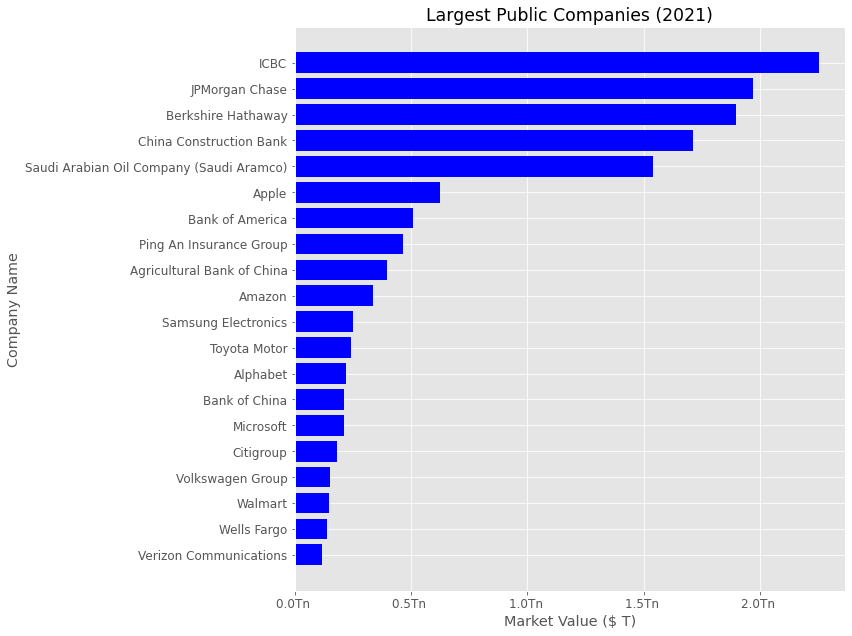

In [65]:
plot_bar3(
    y=df2['Name'], width=df2['MarketValue'].sort_values(ascending=False), color='blue',
    xlabel='Market Value ($ T)', ylabel='Company Name', title='Largest Public Companies (2021)', 
)